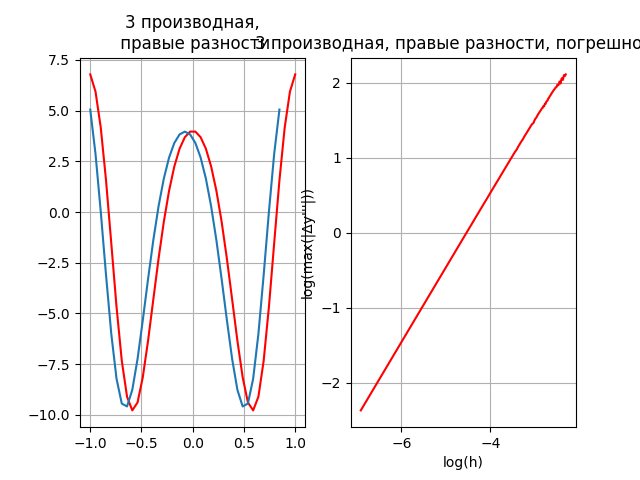

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

n = 40
a = -1
b = 1
h = (b - a) / (n - 1)


def f(x):
    return 1 + (np.tanh(x + x ** 3))


def d3_f(x):
    return 2*(3 - 3*np.tanh(x*(1 + x**2))**2 - (1 + 3*x**2)**3*(-1 + np.tanh(x*(1 + x**2))**2)**2 - 2*(1 + 3*x**2)**3*np.tanh(x*(1 + x**2))**2*(-1 + np.tanh(x*(1 + x**2))**2) + 18*x*(1 + 3*x**2)*(-1 + np.tanh(x*(1 + x**2))**2)*np.tanh(x*(1 + x**2)))


def right_dif3(h, n):
    right_f = []
    x = np.arange(a, b + h, h)
    for i in range(0, n - 3):
        right_f.append((f(x[i + 3]) - 3 * f(x[i + 2]) + 3 * f(x[i + 1]) - f(x[i])) / h ** 3)
    return right_f


x_nodes = np.arange(a, b + h, h)
y_nodes = d3_f(x_nodes)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(x_nodes, y_nodes, color='red')
plt.title("3 производная,\n правые разности")
plt.plot(x_nodes[0:n - 3], right_dif3(h, n))

hmin = 0.001
hstep = 0.001
hmax = 0.1
h_range = np.arange(hmin, hmax, hstep)
h_i_array = []
dfr_array1 = []


def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return max(dfr)


for h_i in h_range:
    h_i_array.append(math.log(h_i))
    x_nodes = np.arange(a, b + h_i, h_i)
    y_nodes = [d3_f(element) for element in x_nodes]
    y_r = right_dif3(h_i, len(x_nodes))
    dfr_array1.append(math.log(difference(y_nodes[0:len(y_nodes) - 3], y_r)))
    y_r.clear()

g3 = plt.subplot(1, 2, 2)
g3.set_xlabel('log(h)')
g3.set_ylabel("log(max(|Δy'''|))")
plt.grid()
plt.title("3 производная, правые разности, погрешность")
plt.plot(h_i_array, dfr_array1, color='red')

plt.show()